In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-12-23 19:51:59.044177: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 19:51:59.230695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 19:51:59.230733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 19:51:59.242783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 19:51:59.290160: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 19:51:59.291061: I tensorflow/core/platform/cpu_feature_guard.cc:1

2.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### preprocess the data

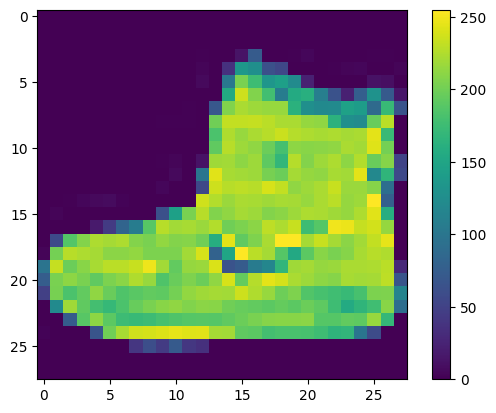

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so,divide the values by 255.

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

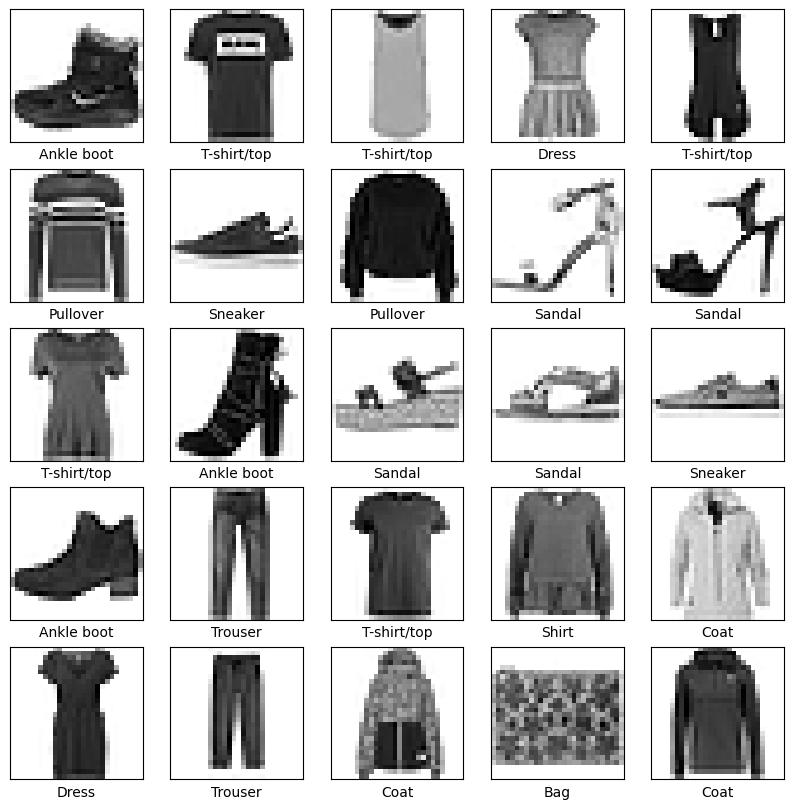

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### set up the layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=30)

2023-12-23 19:52:13.152923: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4944 - accuracy: 0.8260
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8655
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3352 - accuracy: 0.8772
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8868
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8914
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8967
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9013
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9045
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.9066
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [16]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4177 - accuracy: 0.8869 - 283ms/epoch - 903us/step

Test accuracy: 0.886900007724762


### make predictions

In [17]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [19]:
predictions[0]

array([2.5718293e-17, 4.5014626e-15, 3.7136633e-24, 9.4852168e-20,
       5.6487240e-16, 7.1025575e-08, 1.7054005e-12, 1.9434284e-04,
       2.0062427e-13, 9.9980569e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

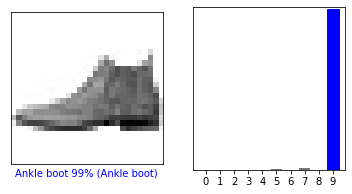

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

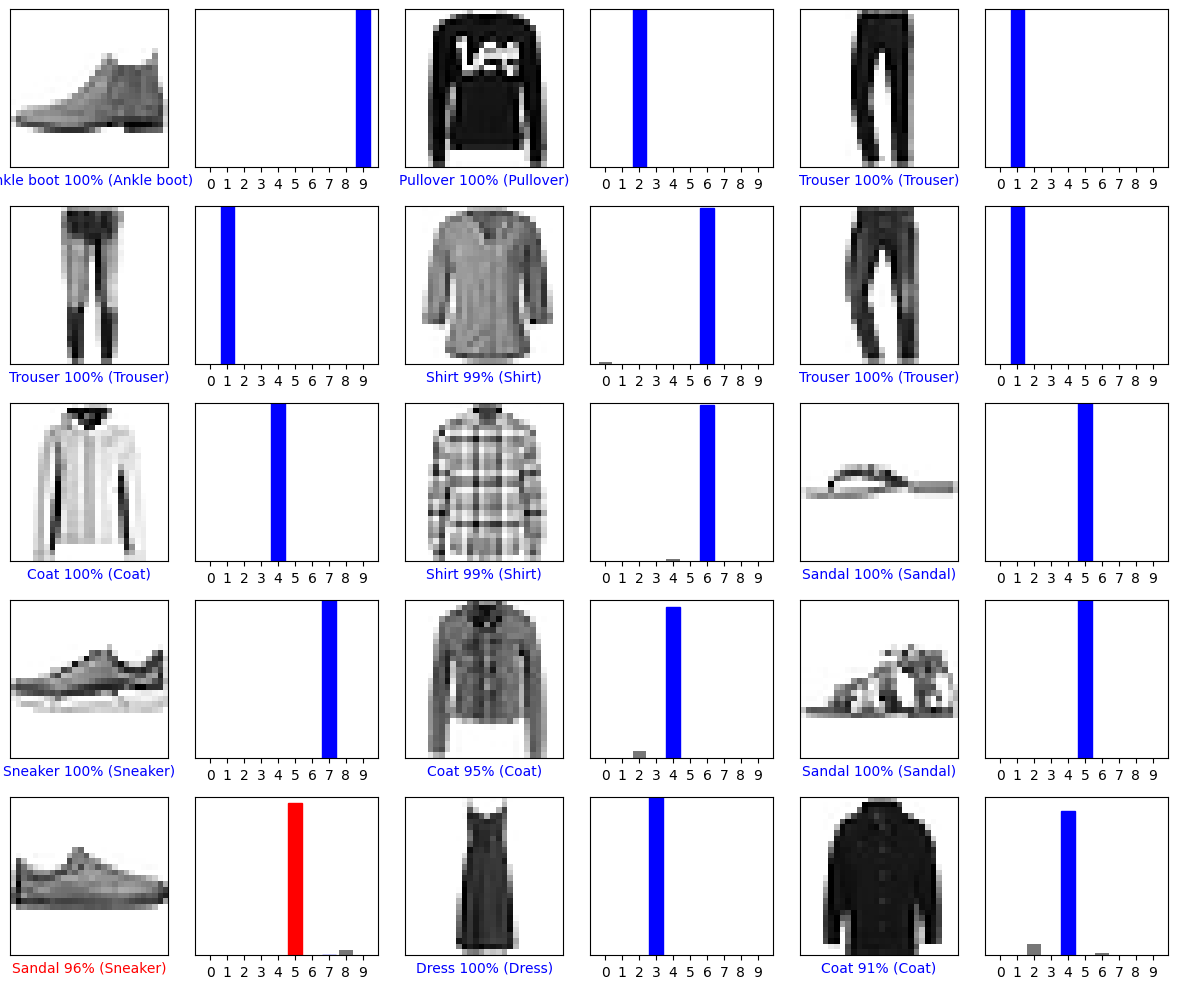

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()